In [1]:
from databaseClass import DB
import utils
import sql_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

import xgboost as xgb
import autosklearn.regression
import tensorflow as tf
import autokeras as ak


2022-01-13 18:12:15.139615: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-13 18:12:15.139674: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
userName = utils.userName
userPass = utils.userPass
dbName = utils.dbName

In [3]:
db = DB(userName = userName, userPass = userPass, dataBaseName = dbName)

In [79]:
df_final.head()

,defensive_rebounds_y_A. Afflalo_NYK,defensive_rebounds_y_A. Afflalo_ORL,defensive_rebounds_y_A. Afflalo_SAC,defensive_rebounds_y_A. Aminu_ORL,defensive_rebounds_y_A. Aminu_POR,defensive_rebounds_y_A. Anderson_LAC,defensive_rebounds_y_A. Anderson_WAS,defensive_rebounds_y_A. Bargnani_BRK,defensive_rebounds_y_A. Baynes_BOS,defensive_rebounds_y_A. Baynes_DET,...,two_point_shots_y_Z. La_MIN,two_point_shots_y_Z. Norvell_GSW,two_point_shots_y_Z. Pachulia_DAL,two_point_shots_y_Z. Pachulia_DET,two_point_shots_y_Z. Pachulia_GSW,two_point_shots_y_Z. Qi_HOU,two_point_shots_y_Z. Randolph_MEM,two_point_shots_y_Z. Randolph_SAC,two_point_shots_y_Z. Smith_PHI,two_point_shots_y_Z. Williamson_NOP
url,,,,,,,,,,,,,,,,,,,,,
/boxscores/201510300ATL.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/boxscores/201510300CLE.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/boxscores/201510300DET.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/boxscores/201510310IND.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/boxscores/201510310LAC.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df_final.describe()

,defensive_rebounds_y_A. Afflalo_NYK,defensive_rebounds_y_A. Afflalo_ORL,defensive_rebounds_y_A. Afflalo_SAC,defensive_rebounds_y_A. Aminu_ORL,defensive_rebounds_y_A. Aminu_POR,defensive_rebounds_y_A. Anderson_LAC,defensive_rebounds_y_A. Anderson_WAS,defensive_rebounds_y_A. Bargnani_BRK,defensive_rebounds_y_A. Baynes_BOS,defensive_rebounds_y_A. Baynes_DET,...,two_point_shots_y_Z. La_MIN,two_point_shots_y_Z. Norvell_GSW,two_point_shots_y_Z. Pachulia_DAL,two_point_shots_y_Z. Pachulia_DET,two_point_shots_y_Z. Pachulia_GSW,two_point_shots_y_Z. Qi_HOU,two_point_shots_y_Z. Randolph_MEM,two_point_shots_y_Z. Randolph_SAC,two_point_shots_y_Z. Smith_PHI,two_point_shots_y_Z. Williamson_NOP
count,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,...,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000,6571.000000
mean,0.033834,0.003398,0.011819,0.007457,0.284471,0.000861,0.002637,0.006797,0.081557,0.061586,...,0.156087,0.000152,0.072383,0.027901,0.095721,0.002132,0.283824,0.090998,0.003651,0.077866
std,0.362081,0.086282,0.166455,0.176385,1.304224,0.036496,0.075993,0.134958,0.570527,0.461661,...,1.154781,0.012336,0.693128,0.300806,0.654243,0.051681,1.896587,0.987050,0.113740,1.097532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.330000,3.000000,4.330000,6.330000,10.670000,2.330000,2.670000,3.670000,7.670000,7.330000,...,15.000000,1.000000,11.000000,5.330000,7.670000,1.670000,18.330000,15.000000,5.330000,19.330000


In [43]:
df_url_spread, df_final = get_final_data()

<AxesSubplot:xlabel='spread_target', ylabel='Count'>

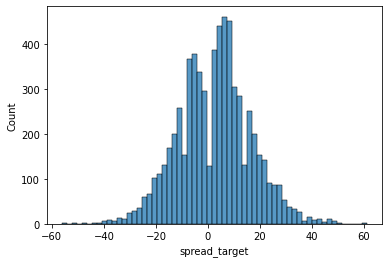

In [83]:
sns.histplot(data=df_url_spread['spread_target'])

In [44]:
pca = PCA(n_components=1000)
principalComponents = pca.fit_transform(df_final)
principalDf = pd.DataFrame(data = principalComponents)

In [45]:
principalDf

# QUESTION - what's the easiest way to reduce these value types (float64 to float8)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-2.441268,-0.554502,-0.446093,-1.195887,-1.462241,-0.340129,-0.137608,-0.593095,0.361313,0.174760,...,-0.140025,-0.228238,0.234412,0.143599,0.084972,-0.026708,-0.177829,-0.021549,0.190346,-0.030494
1,-4.214865,2.833248,-8.030863,-2.888081,-8.127386,-4.321801,-1.074577,-20.389564,-8.700695,-4.182127,...,0.060664,0.203877,-0.224744,0.021033,-0.085027,0.482661,-0.133133,-0.004539,-0.105462,-0.391453
2,-5.911426,-1.621148,-3.809994,-1.558096,-3.548004,-2.554576,0.606677,-5.143633,1.825869,2.394684,...,-0.035114,0.065299,0.482629,0.527784,0.073847,-0.028605,-0.061541,-0.323881,-0.767583,-0.143621
3,-1.983261,-0.435268,1.938176,-2.161617,-0.718025,1.035931,0.665200,-1.616880,0.365870,2.102391,...,-0.598392,-0.746279,0.217165,0.947319,-1.200849,1.149737,-0.653933,-1.039430,-0.087963,1.209115
4,-0.642198,-0.474531,0.618139,-3.027464,-0.586916,-0.100154,0.713309,-0.769629,2.234536,0.901877,...,-0.111632,0.134635,-0.330989,0.091678,-0.442615,-0.084703,0.054621,0.030917,-0.169775,0.220825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6566,-2.790314,-1.138064,-0.277801,-0.626902,-1.374026,0.465669,-0.853049,-1.617241,0.814989,0.540181,...,0.189036,0.491136,0.073206,-0.489385,-0.428235,-0.324159,-0.556377,-0.035950,0.090738,-0.379881
6567,-1.500267,-0.862348,1.843592,-1.801031,-0.103920,2.569079,-2.446306,0.212755,1.399824,0.652091,...,0.123526,-0.072957,0.150117,0.183891,-0.263000,-0.495627,0.654481,-0.037728,0.099819,-0.352421
6568,-3.324167,-1.119443,-0.444495,-1.077420,-1.057251,-0.462229,-0.682954,-0.681441,0.675980,0.255859,...,0.790773,-0.393925,0.131271,0.004983,0.060819,-0.418709,-0.195795,0.331365,-0.084593,-0.470734
6569,-6.207351,-2.153290,-2.762989,0.399415,-3.294372,-0.194876,-1.148651,-2.447570,0.822171,0.768930,...,0.177404,-0.347474,-0.076470,-0.496984,-0.062490,0.864301,0.297900,0.419346,1.109304,0.993800


In [46]:
# # Separating out the features
x = principalDf
# Separating out the target
y = df_url_spread
# Standardizing the features
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

#pickle a standardscaler object or find values and save. 
#question: what if i had new data in the future.  how would i use the same standardscaler object to apply the same scaling?

In [78]:
type(x[0][0])

numpy.float64

<AxesSubplot:ylabel='Count'>

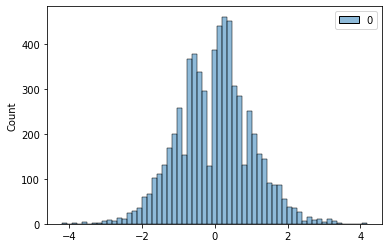

In [58]:
sns.histplot(data=y)

<AxesSubplot:ylabel='Count'>

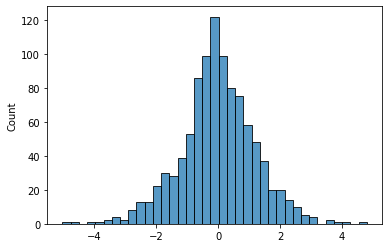

In [91]:
sns.histplot(data=X_train[0])

In [23]:
df_final = db.DBtoDF(generate_sql('sql_files/final.sql'))

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124431 entries, 0 to 124430
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   url                       124431 non-null  object 
 1   gametype                  124431 non-null  object 
 2   date                      124431 non-null  object 
 3   hometeam                  124431 non-null  object 
 4   awayteam                  124431 non-null  object 
 5   player                    124431 non-null  object 
 6   team                      124431 non-null  object 
 7   two_point_shots_made_x    124431 non-null  float64
 8   two_point_shots_x         124431 non-null  float64
 9   three_point_shots_made_x  124431 non-null  float64
 10  three_point_shots_x       124431 non-null  float64
 11  total_makes_x             124431 non-null  float64
 12  total_shots_x             124431 non-null  float64
 13  defensive_rebounds_x      114402 non-null  f

In [5]:
db = DB(userName = userName, userPass = userPass, dataBaseName = dbName)

def generate_sql(input_sql_file):
    '''helper function for build_table.'''
    with open(input_sql_file, 'r') as file:
        sql = file.read()
        return sql
    
def build_table(sql_file, table_name):
    '''postgres does not have a create or replace table option.  so we do that here instead'''
    try:
        db.BuildTableFromQuery(generate_sql(sql_file), table_name)
    except:
        db.dropTable(table_name)
        db.BuildTableFromQuery(generate_sql(sql_file), table_name)

def get_final_data():
    '''shapes data before cleaning'''
    df_final = db.DBtoDF(generate_sql('sql_files/final.sql'))
    df_url_spread = df_final[['url', 'spread_target']]
    df_url_spread = df_url_spread.groupby('url').mean()

    #values are the features we plan to use for modeling
    values = ['two_point_shots_made_y','two_point_shots_y',
              'three_point_shots_made_y','three_point_shots_y',
              'total_makes_y','total_shots_y','defensive_rebounds_y',
              'offensive_rebounds_y']
    
    teams_gametype =   ['url','gametype_regular', 'hometeam_ATL', 'hometeam_BOS', 'hometeam_BRK',
                       'hometeam_CHI', 'hometeam_CHO', 'hometeam_CLE', 'hometeam_DAL',
                       'hometeam_DEN', 'hometeam_DET', 'hometeam_GSW', 'hometeam_HOU',
                       'hometeam_IND', 'hometeam_LAC', 'hometeam_LAL', 'hometeam_MEM',
                       'hometeam_MIA', 'hometeam_MIL', 'hometeam_MIN', 'hometeam_NOP',
                       'hometeam_NYK', 'hometeam_OKC', 'hometeam_ORL', 'hometeam_PHI',
                       'hometeam_PHO', 'hometeam_POR', 'hometeam_SAC', 'hometeam_SAS',
                       'hometeam_TOR', 'hometeam_UTA', 'hometeam_WAS', 'awayteam_ATL',
                       'awayteam_BOS', 'awayteam_BRK', 'awayteam_CHI', 'awayteam_CHO',
                       'awayteam_CLE', 'awayteam_DAL', 'awayteam_DEN', 'awayteam_DET',
                       'awayteam_GSW', 'awayteam_HOU', 'awayteam_IND', 'awayteam_LAC',
                       'awayteam_LAL', 'awayteam_MEM', 'awayteam_MIA', 'awayteam_MIL',
                       'awayteam_MIN', 'awayteam_NOP', 'awayteam_NYK', 'awayteam_OKC',
                       'awayteam_ORL', 'awayteam_PHI', 'awayteam_PHO', 'awayteam_POR',
                       'awayteam_SAC', 'awayteam_SAS', 'awayteam_TOR', 'awayteam_UTA',
                       'awayteam_WAS']
    
    #include gametype, hometeam, and awayteam in separate dataframe to join to df_final
    df_dummies = pd.get_dummies(df_final, columns=['gametype','hometeam', 'awayteam'])[teams_gametype].groupby('url').agg('max')
    
    #df is now going to be in the right shape for modeling
    df_final = pd.pivot_table(df_final, values=values, 
                                        columns=['player_team_y'],
                                        index='url',
                                        aggfunc=np.mean)
    #collapsing the pivot multi index
    df_final.columns = df_final.columns.to_series().str.join('_')
    df_final = df_final.fillna(0)
    df_final = df_final.merge(df_dummies, how='left', on='url')
    #df_final = df_final.round(2)
    return df_url_spread, df_final


def clean_data():
    df_url_spread, df_final = get_final_data()
    
#     pca
    pca = PCA(n_components=1000)
    principalComponents = pca.fit_transform(df_final)
    principalDf = pd.DataFrame(data = principalComponents)
    
    # scale data
    # Separating out the features
    x = principalDf
    # Separating out the target
    y = df_url_spread
    
    # use x,y below if not using pca
#     x = df_final
#     y = df_url_spread
    
    
    # Standardizing the features
    x = StandardScaler().fit_transform(x).round(2)
    # y = StandardScaler().fit_transform(y).round(2)
    
    X_train, X_test, y_train, y_test  = train_test_split(x,y) 
    return X_train, X_test, y_train, y_test


def evaluate_model(pred_train, pred_test):
    print(f"scores for model: ")
    print("Train R2 score:", round(r2_score(y_train, pred_train),2))
    print("Train rmse score:", round(np.sqrt(MSE(y_train, pred_train)),2))
    print("Test R2 score:", round(r2_score(y_test, pred_test),2))
    print("Test rmse score:", round(np.sqrt(MSE(y_test, pred_test)),2))
    

def build_xgb():
    #prep data for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    #play with hyperparemters
    param = {'max_depth': 3, 'eta': .1, 'objective': 'reg:squarederror'}
    param['nthread'] = 4
    param['eval_metric'] = 'rmse'
    num_round = 10
    
    #train
    bst = xgb.train(param, dtrain, num_round)
    xgb_pred_train = bst.predict(dtrain)
    xgb_pred_test = bst.predict(dtest)
    
    evaluate_model(xgb_pred_train, xgb_pred_test)
    
    
def build_automl():
    automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=60,
    per_run_time_limit=30
    )
    
    automl.fit(X_train, y_train)
    automl_train_pred = automl.predict(X_train)
    automl_test_pred = automl.predict(X_test)
    evaluate_model(automl_train_pred, automl_test_pred)
    
#using auto keras
def build_autokeras():
    
#     train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#     test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    
    reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
    # Feed the structured data regressor with training data.
    reg.fit(X_train, y_train, epochs=10)
  # reg.fit(train_set, epochs=10)

    
    autokeras_train_pred = reg.predict(X_train)
    autokeras_test_pred = reg.predict(X_test)
    
    
#     autokeras_train_pred = reg.predict(train_set)
#     autokeras_test_pred = reg.predict(test_set)
    # Evaluate the best model with testing data.
    print(reg.evaluate(X_train, y_train))
    print(reg.evaluate(X_test, y_test))

    evaluate_model(autokeras_train_pred, autokeras_test_pred)

In [ ]:
#notes
# do elbow method in increments of 100 on PCA
# don't recommend rounding to save memory

In [6]:
df_url_spread, df_final = get_final_data()

In [8]:
df_final.head()

,defensive_rebounds_y_A. Afflalo_NYK,defensive_rebounds_y_A. Afflalo_ORL,defensive_rebounds_y_A. Afflalo_SAC,defensive_rebounds_y_A. Aminu_ORL,defensive_rebounds_y_A. Aminu_POR,defensive_rebounds_y_A. Anderson_LAC,defensive_rebounds_y_A. Anderson_WAS,defensive_rebounds_y_A. Bargnani_BRK,defensive_rebounds_y_A. Baynes_BOS,defensive_rebounds_y_A. Baynes_DET,...,awayteam_OKC,awayteam_ORL,awayteam_PHI,awayteam_PHO,awayteam_POR,awayteam_SAC,awayteam_SAS,awayteam_TOR,awayteam_UTA,awayteam_WAS
url,,,,,,,,,,,,,,,,,,,,,
/boxscores/201510300ATL.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
/boxscores/201510300CLE.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
/boxscores/201510300DET.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,...,0,0,0,0,0,0,0,0,0,0
/boxscores/201510310IND.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
/boxscores/201510310LAC.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = clean_data()

In [10]:
type(X_test[0][0])
#question - even though i've rounded, the type is still float64.  how do i make entire set float16 or smaller?

numpy.float64

In [6]:
X_test[0][0]

-0.23

In [16]:
type(X_test[0][0].astype('float16'))

numpy.float16

In [8]:
#with hometeam, awayteam, and gametype, PCA and not standardizing y
build_xgb()

scores for model: 
Train R2 score: 0.03
Train rmse score: 13.81
Test R2 score: -0.0
Test rmse score: 13.89


In [19]:
#with hometeam, awayteam, and gametype, no PCA and not standardizing y
build_xgb()

scores for model: 
Train R2 score: 0.05
Train rmse score: 13.58
Test R2 score: 0.02
Test rmse score: 13.97


In [52]:
#with hometeam, awayteam, and gametype, and no PCA
build_xgb()

scores for model: 
Train R2 score: 0.02
Train rmse score: 0.99
Test R2 score: 0.0
Test rmse score: 0.98


In [7]:
#without hometeam, awayteam, and gametype
build_xgb()

scores for model: 
Train R2 score: 0.01
Train rmse score: 1.0
Test R2 score: -0.04
Test rmse score: 1.0


In [9]:
build_automl()

[WARNING] [2022-01-13 15:17:52,909:Client-AutoML(1):07c6fd71-74c7-11ec-b175-3052cb825aaf] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
scores for model: 
Train R2 score: -0.0
Train rmse score: 14.02
Test R2 score: -0.0
Test rmse score: 13.86


In [7]:
#with hometeam, awayteam, and gametype, and PCA
build_autokeras()

Trial 3 Complete [00h 00m 47s]
val_loss: 204.48033142089844

Best val_loss So Far: 203.654541015625
Total elapsed time: 00h 02m 25s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
154/154 [==============================] - 10s 15ms/step - loss: 199.9235 - mean_squared_error: 199.9235
Epoch 2/10
154/154 [==============================] - 3s 23ms/step - loss: 179.5255 - mean_squared_error: 179.5255
Epoch 3/10
154/154 [==============================] - 4s 25ms/step - loss: 152.5719 - mean_squared_error: 152.5719
Epoch 4/10
154/154 [==============================] - 4s 23ms/step - loss: 120.9246 - mean_squared_error: 120.9246
Epoch 5/10
154/154 [==============================] - 2s 16ms/step - loss: 88.4690 - mean_squared_error: 88.4690
Epoch 6/10
154/154 [==============================] - 3s 17ms/step - loss: 59.0453 - mean_squared_error: 59.0453
Epoch 7/10
154/154 [==============================] - 2s 15ms/step - loss: 36.5194 - mean_squared_error: 36.5194
Epoch 8/10
154/154 [==========

2022-01-13 15:14:34.313028: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets
154/154 [==============================] - 8s 10ms/step - loss: 15.0319 - mean_squared_error: 15.0319
[15.031882286071777, 15.031882286071777]
52/52 [==============================] - 16s 25ms/step - loss: 305.0461 - mean_squared_error: 305.0461
[305.0461120605469, 305.0461120605469]
scores for model: 
Train R2 score: 0.92
Train rmse score: 3.88
Test R2 score: -0.59
Test rmse score: 17.47


In [ ]:
#print(automl.leaderboard())

In [ ]:
#print(automl.show_models())

In [24]:
reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=10)

Trial 3 Complete [00h 00m 35s]
val_loss: 1.073466181755066

Best val_loss So Far: 1.073466181755066
Total elapsed time: 00h 01m 50s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
154/154 [==============================] - 7s 9ms/step - loss: 1.1181 - mean_squared_error: 1.1181
Epoch 2/10
154/154 [==============================] - 2s 10ms/step - loss: 0.9101 - mean_squared_error: 0.9101
Epoch 3/10
154/154 [==============================] - 2s 10ms/step - loss: 0.7821 - mean_squared_error: 0.7821
Epoch 4/10
154/154 [==============================] - 2s 11ms/step - loss: 0.6648 - mean_squared_error: 0.6648
Epoch 5/10
154/154 [==============================] - 2s 10ms/step - loss: 0.5815 - mean_squared_error: 0.5815
Epoch 6/10
154/154 [==============================] - 2s 10ms/step - loss: 0.5240 - mean_squared_error: 0.5240
Epoch 7/10
154/154 [==============================] - 2s 10ms/step - loss: 0.4323 - mean_squared_error: 0.4323
Epoch 8/10
154/154 [==============================] - 

In [25]:
autokeras_train_pred = reg.predict(X_train)
autokeras_test_pred = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_train, y_train))
print(reg.evaluate(X_test, y_test))


154/154 [==============================] - 5s 9ms/step - loss: 0.2241 - mean_squared_error: 0.2241
[0.22414299845695496, 0.22414299845695496]
52/52 [==============================] - 4s 9ms/step - loss: 1.4043 - mean_squared_error: 1.4043
[1.4043149948120117, 1.4043149948120117]


In [27]:
print("Test R2 score:", r2_score(y_test, autokeras_test_pred))
print("Test rmse score:", np.sqrt(MSE(y_test, autokeras_test_pred)))

Test R2 score: -0.376924485817705
Test rmse score: 1.1850378273574964
